<a href="https://colab.research.google.com/github/AnitaKirkovska/Machine_Learning_Class/blob/master/HW2/My_Solutions/CIFAR10_K_fold_DataAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the data**

In [0]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

**Preprocess the data**

In [0]:
from keras.utils import to_categorical

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**The Architecture**

In [0]:
from keras import models
from keras import layers
import keras

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(train_images)

opt = keras.optimizers.rmsprop(lr=0.0005, decay=1e-6)


def build_model():
  model = models.Sequential()
  
  model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D(2,2))

  model.add(layers.Conv2D(128, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D(2,2))

  model.add(layers.Conv2D(256, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D(2,2))

  model.add(layers.Flatten())

  model.add(layers.Dense(10, activation='softmax'))
  model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])

  return model

**K-fold validation**

In [13]:
import numpy as np 

k = 5

num_val_samples = len(train_images)//k
all_histories = []

for i in range(k):
  print('processing fold #', i)
  val_images = train_images[i* num_val_samples: (i+1) * num_val_samples]
  val_labels = train_labels[i* num_val_samples: (i+1) * num_val_samples]
  
  partial_train_images = np.concatenate(
    [train_images[:i * num_val_samples],
    train_images[(i+1)* num_val_samples:]],
    axis=0)
  
  partial_train_labels = np.concatenate(
    [train_labels[:i * num_val_samples],
    train_labels[(i+1)* num_val_samples:]],
    axis=0)
  
  model = build_model()
  history = model.fit_generator(datagen.flow(partial_train_images, 
                                           partial_train_labels, 
                                           batch_size=32),
                                           epochs=50,
                                           steps_per_epoch=1250,
                                           validation_data=(val_images, val_labels),
                                           validation_steps=312)
  k_history = history.history['val_acc']
  all_histories.append(k_history)

processing fold # 0
Epoch 1/50
1250/1250 [==============================] - 31s 25ms/step - loss: 1.7910 - acc: 0.3432 - val_loss: 1.4261 - val_acc: 0.4916
Epoch 2/50
1250/1250 [==============================] - 31s 25ms/step - loss: 1.5065 - acc: 0.4616 - val_loss: 1.3189 - val_acc: 0.5284
Epoch 3/50
1250/1250 [==============================] - 31s 25ms/step - loss: 1.3591 - acc: 0.5175 - val_loss: 1.3537 - val_acc: 0.5410
Epoch 4/50
1250/1250 [==============================] - 31s 25ms/step - loss: 1.2674 - acc: 0.5543 - val_loss: 1.0973 - val_acc: 0.6132
Epoch 5/50
1250/1250 [==============================] - 31s 25ms/step - loss: 1.1923 - acc: 0.5809 - val_loss: 1.0122 - val_acc: 0.6477
Epoch 6/50
1250/1250 [==============================] - 32s 25ms/step - loss: 1.1326 - acc: 0.6049 - val_loss: 0.9280 - val_acc: 0.6804
Epoch 7/50
1250/1250 [==============================] - 32s 26ms/step - loss: 1.0829 - acc: 0.6204 - val_loss: 0.9063 - val_acc: 0.6853
Epoch 8/50
1250/1250 [======

**Successive mean K-fold validation scores**

In [0]:
average_history = [
    np.mean([x[i] for x in all_histories]) for i in range (50)
]

**Plotting validation scores**

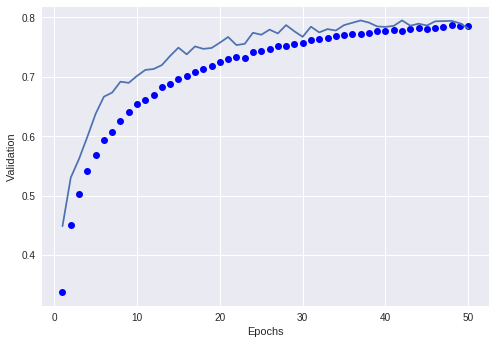

[[0.4916,
  0.5284,
  0.541,
  0.6132,
  0.6477,
  0.6804,
  0.6853,
  0.7028,
  0.6942,
  0.7052,
  0.7414,
  0.7205,
  0.7063,
  0.7381,
  0.7574,
  0.7052,
  0.7347,
  0.7335,
  0.7464,
  0.7641,
  0.7648,
  0.7551,
  0.7755,
  0.7662,
  0.7721,
  0.7782,
  0.7774,
  0.7808,
  0.769,
  0.7736,
  0.7831,
  0.7544,
  0.7624,
  0.7595,
  0.7667,
  0.7869,
  0.7935,
  0.776,
  0.7556,
  0.7764,
  0.7889,
  0.8032,
  0.7817,
  0.7864,
  0.782,
  0.788,
  0.7897,
  0.7974,
  0.7792,
  0.7858],
 [0.4313,
  0.5656,
  0.6054,
  0.5856,
  0.6412,
  0.662,
  0.6732,
  0.6835,
  0.6988,
  0.7079,
  0.7034,
  0.7361,
  0.7403,
  0.741,
  0.7507,
  0.7448,
  0.765,
  0.7603,
  0.7592,
  0.7676,
  0.7728,
  0.7627,
  0.7668,
  0.7685,
  0.7906,
  0.7916,
  0.7616,
  0.7875,
  0.7781,
  0.7662,
  0.7757,
  0.7791,
  0.771,
  0.7823,
  0.7906,
  0.796,
  0.7917,
  0.7943,
  0.7968,
  0.7942,
  0.8001,
  0.7939,
  0.7698,
  0.7985,
  0.7937,
  0.7971,
  0.787,
  0.7919,
  0.795,
  0.7908],
 [0.4589,


In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(range(1, len(average_history)+1),  average_history)
plt.xlabel("Epochs")
plt.ylabel("Validation")
plt.show()

all_histories